In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
marketing_df = pd.read_csv("data_marketing.csv")
marketing_df.head(5)

,Unnamed: 0,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48


In [37]:
marketing_df.tail(3)

,Unnamed: 0,youtube,facebook,newspaper,sales
197,198,212.40,11.16,7.68,15.36
198,199,340.32,50.40,79.44,30.60
199,200,278.52,10.32,10.44,16.08


In [38]:
marketing_df.columns

Index(['Unnamed: 0', 'youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [39]:
marketing_df.dtypes

Unnamed: 0      int64
youtube       float64
facebook      float64
newspaper     float64
sales         float64
dtype: object

In [40]:
marketing_df.describe()

,Unnamed: 0,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,176.451000,27.916800,36.664800,16.827000
std,57.879185,103.025084,17.816171,26.134345,6.260948
min,1.000000,0.840000,0.000000,0.360000,1.920000
25%,50.750000,89.250000,11.970000,15.300000,12.450000
50%,100.500000,179.700000,27.480000,30.900000,15.480000
75%,150.250000,262.590000,43.830000,54.120000,20.880000
max,200.000000,355.680000,59.520000,136.800000,32.400000


### Data Cleansing

In [41]:
marketing_df = marketing_df.drop(['Unnamed: 0'], axis = 1)
marketing_df.head(3)

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16


In [42]:
marketing_df.shape

(200, 4)

In [43]:
marketing_df[marketing_df.duplicated()]

,youtube,facebook,newspaper,sales


### Outliers?

<Axes: xlabel='youtube'>

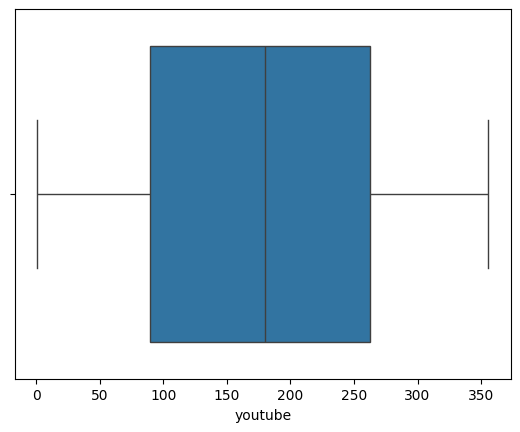

In [171]:
sns.boxplot(x=marketing_df['youtube'])

<Axes: xlabel='facebook'>

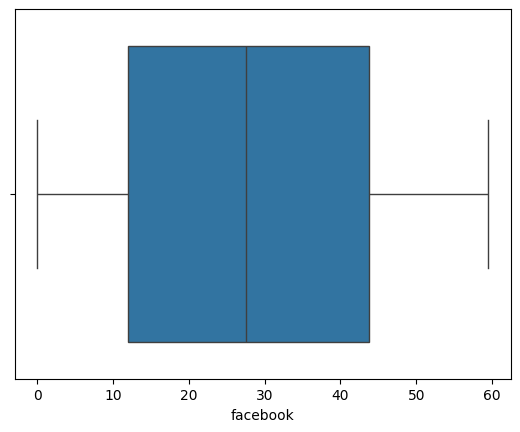

In [49]:
sns.boxplot(x=marketing_df['facebook'])

<Axes: xlabel='newspaper'>

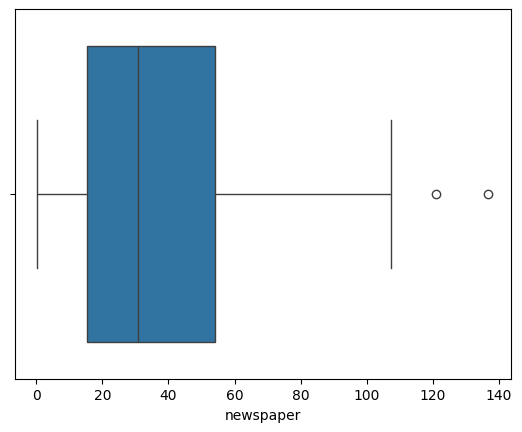

In [50]:
sns.boxplot(x=marketing_df['newspaper'])

In [58]:
marketing_df[marketing_df['newspaper'] > 120]

,youtube,facebook,newspaper,sales
16,81.36,43.92,136.80,15.00
101,355.68,43.56,121.08,28.56


<Axes: xlabel='sales'>

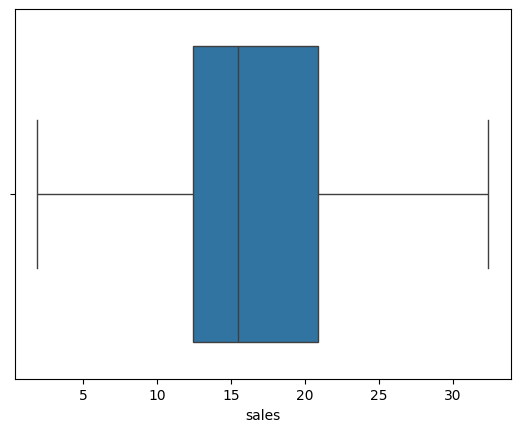

In [53]:
sns.boxplot(x=marketing_df['sales'])

### Univariate analysis

<Axes: xlabel='newspaper', ylabel='Count'>

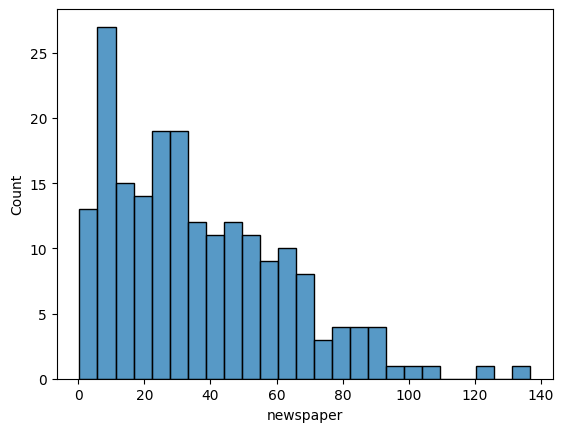

In [55]:
sns.histplot(marketing_df['newspaper'], bins=25)

### Bivariate analysis

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


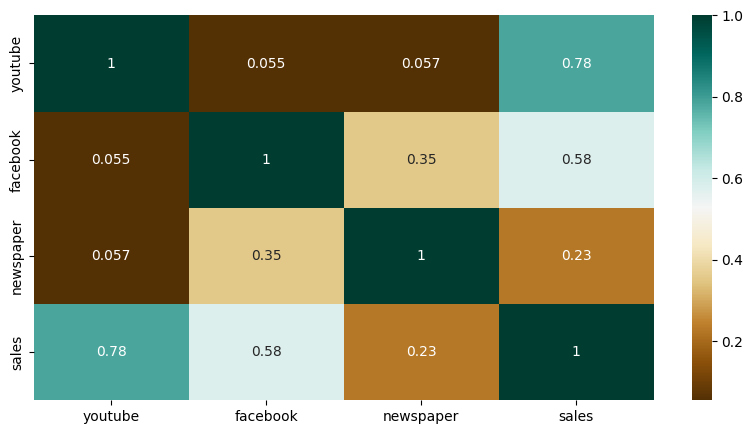

In [164]:
plt.figure(figsize=(10,5))
corr= marketing_df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr

<Axes: xlabel='youtube', ylabel='sales'>

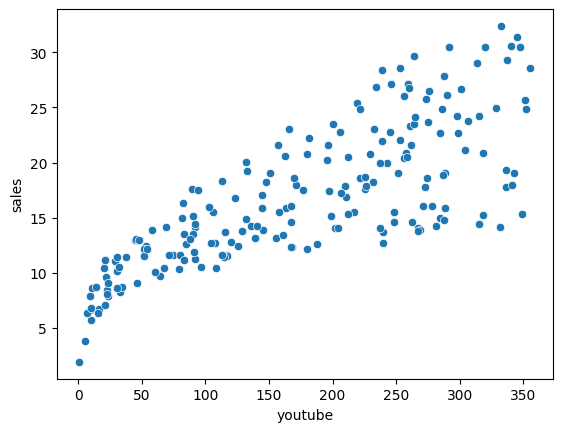

In [62]:
sns.scatterplot(x='youtube', y='sales', data=marketing_df)

<Axes: xlabel='facebook', ylabel='sales'>

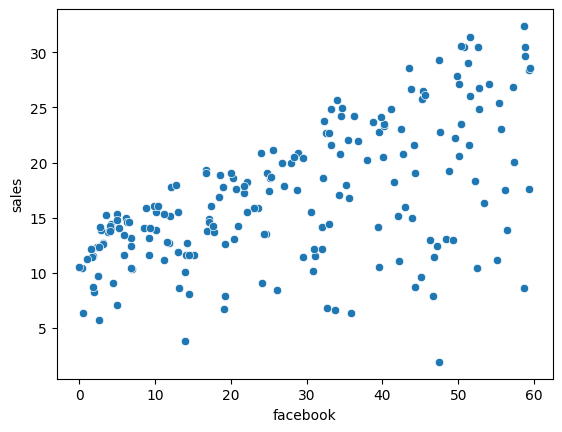

In [65]:
sns.scatterplot(x='facebook', y='sales', data=marketing_df)

<Axes: xlabel='newspaper', ylabel='sales'>

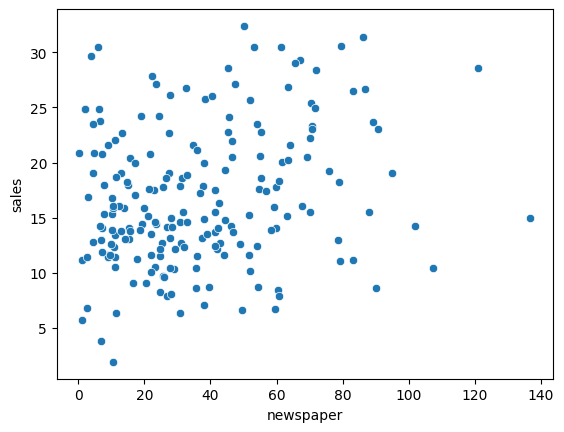

In [66]:
sns.scatterplot(x='newspaper', y='sales', data=marketing_df)

### Supuestos Regresión Lineal Múltiple

#### Supuesto 1: Independencia entre las observaciones (no autocorrelación)

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


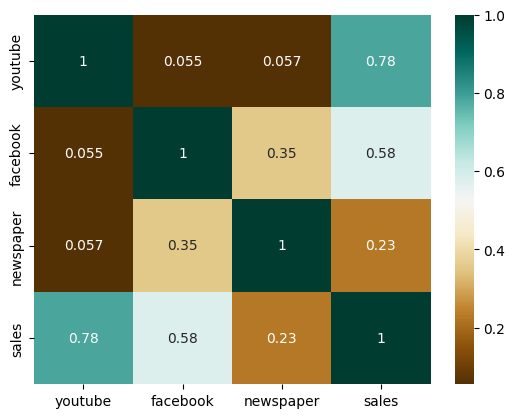

In [74]:
correlation = marketing_df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
correlation

In [91]:
independent_df = marketing_df.drop(['sales'], axis = 1)
independent_df.head(3)

,youtube,facebook,newspaper
0,276.12,45.36,83.04
1,53.40,47.16,54.12
2,20.64,55.08,83.16


,youtube,facebook,newspaper
youtube,1.000000,0.054809,0.056648
facebook,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


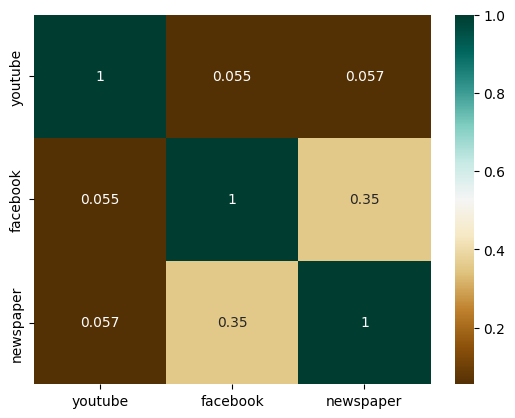

In [93]:
corr = independent_df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr

|  Rango | Relación lineal |
| --- | --- |
|  0.50 - 0.69 | Moderada |

#### Supuesto 2: Normalidad

#### Revisión gráfica

<Axes: xlabel='sales', ylabel='Count'>

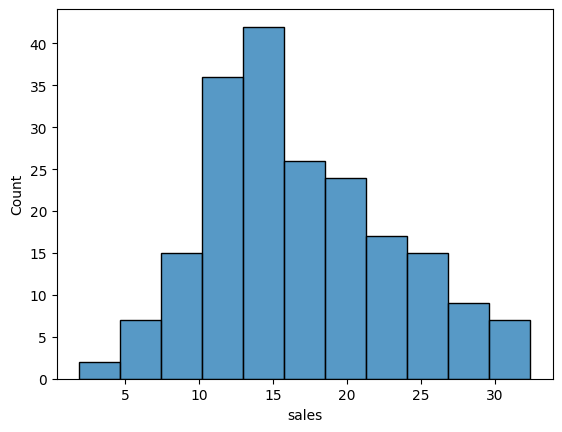

In [190]:
sns.histplot(marketing_df['sales'])

#### Revisión estadística

In [191]:
shapiro(marketing_df['sales'])

ShapiroResult(statistic=0.976026225990542, pvalue=0.0016828565078877893)

In [192]:
shapiro(marketing_df['sales']).pvalue < 0.05

True

#### Supuesto 3: Linealidad

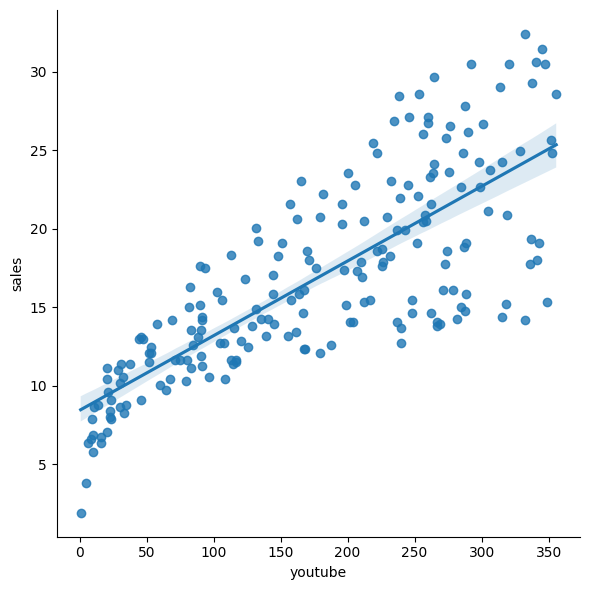

In [135]:
#Youtube vs Sales
plot2 = sns.lmplot(x = "youtube", y = "sales", height = 6, data = marketing_df)

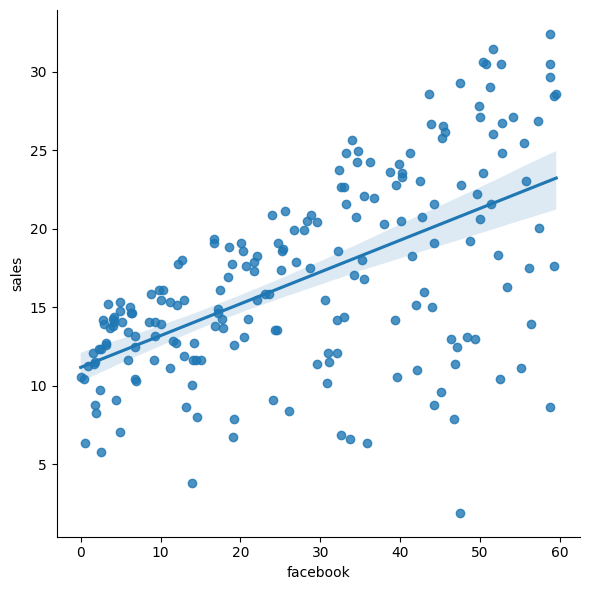

In [136]:
#facebook vs Sales
plot2 = sns.lmplot(x = "facebook", y = "sales", height = 6, data = marketing_df)

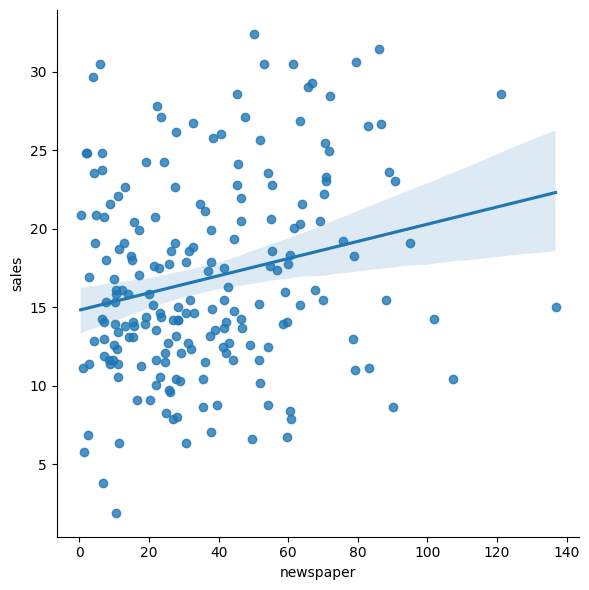

In [137]:
#newspaper vs Sales
plot2 = sns.lmplot(x = "newspaper", y = "sales", height = 6, data = marketing_df)

#### Supuesto 4: Homocedasticidad
#### Repaso de supuestos para este modelo.

- Independencia: si
- Normalidad: si
- Linealidad: si yt
- Homocedasticidad: Lo veremos una vez ajustado el modelo

In [193]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [145]:
fit = smf.ols('sales ~ youtube + facebook + newspaper', data=marketing_df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        20:58:23   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

#### p-values

- **p-value youtube**: p-value: 0.000 < 0.05, la var es estadísticamente significativa.   P>|t|
- **p-value facebook**: p-value: 0.000 < 0.05, la var es estadísticamente significativa.  P>|t|
- **p-value newspaper**: p-value: 0.860 > 0.05, por lo que la var **no** es estadísticamente significativa para el modelo.  P>|t|


#### Coeficientes

- **youtube**: Coef influye positivamente, c/ unidad de yt, sales aumenta: 0.0458. 
- **facebook**: Coef influye positivamente, c/ unidad de fb, sales aumenta: 0.1885.
- **newspaper**: Coef negativo: -0.0010. Por lo que tiene una influencia **negativa** sobre la variable dependiente.

#### Intercept

- 3.5267 es: **sales** cuando las var_indep son 0.     


#### R cuadrado
R-squared: 0.897. Entre más cercano a 1, mejor.
En nuestra regresión es del 89.7%.
Por lo tanto, el R-squared nos dice que las variables independientes youtube, facebook, newspaper pueden explicar en un 89.7% la variacion sales.

#### Predicción
##### Formula Regresion Lineal

In [194]:
# dependent_var = intercepto + independent_var * independent_coef
youtube = 100
facebook = 200
newspaper = 50
sales_var = 3.5267 + (0.0458*youtube) + (0.1885*facebook) + (-0.0010*newspaper)
sales_var

45.75670000000001

Si invirtieramos 100, 200 y 50 unidades para youtube, facebook y newsspaper, respectivamente, esperariamos un aumento en sales de 45.756 unidades.

#### Supuesto 4: Homocedasticidad

In [188]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result) #p-value de 0.162, por lo tanto, es mayor a 0.05 y si se cumple el supuesto de homocedasticidad.

[('Lagrange multiplier statistic', 5.132872353285234),
 ('p-value', 0.16232215845414963)]

### Concluciones.
Se cumplen los 4 supuestos de Regresion Lineal.
- Independencia: si
- Normalidad: si
- Linealidad: si
- Homocedasticidad: si

Con el summary podemos hacer una conjetura confiable de la variable "sales" a partir de las variables youtube y facebook que influyen positivamente y newspaper que influye negativamente. Como las variables son independientes sn estadisticamente significativas. Ademas la variacion de sales puede explicarse en un 89.7% con los valores de las variables independientes. Podriamos se podria hacer un analisis un poco mas detallado al remover newspaper del modelo y ajustar nuestros datos, para que sean mucho mas confiables.